In [1]:
import pandas as pd
data = pd.read_csv(r'C:\Users\OM\Downloads\Timeseries\exchange_rate.csv')
data

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

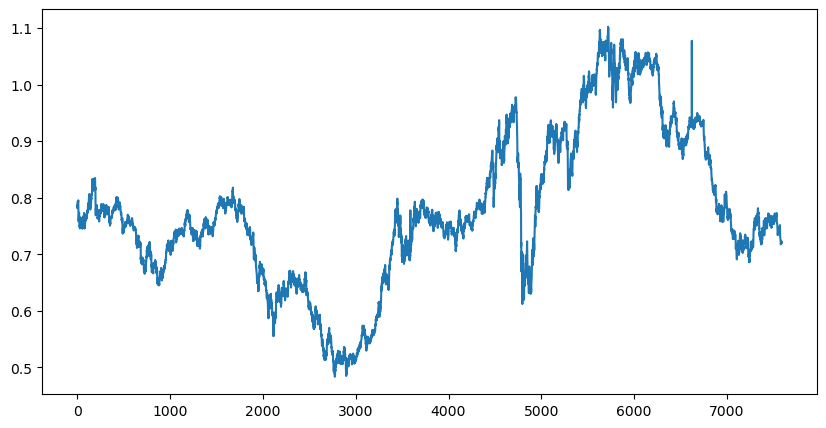

In [3]:
plt.figure(figsize = (10,5))
data.Ex_rate.plot()

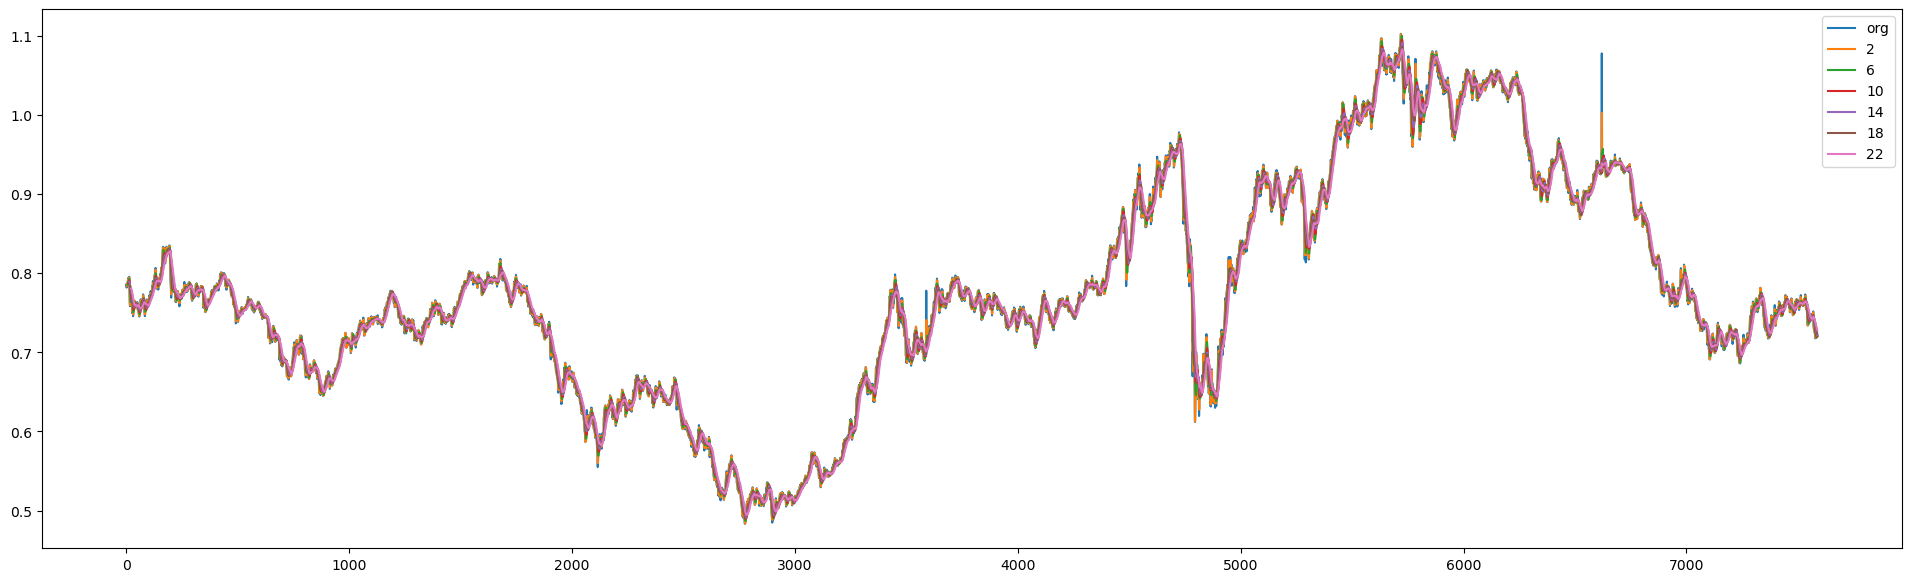

In [4]:
plt.figure(figsize=(24,7))
data.Ex_rate.plot(label="org")
for i in range(2,24,4):
    data["Ex_rate"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

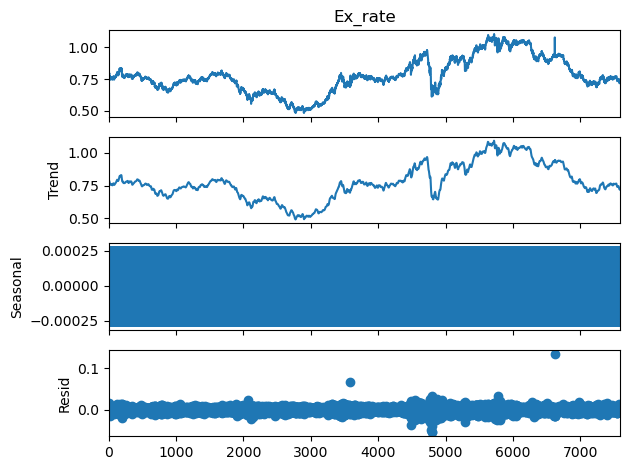

In [6]:
decompose_ts_add = seasonal_decompose(data.Ex_rate,period=12)
decompose_ts_add.plot()
plt.show()

## Part 2: Model Building - ARIMA

1.Parameter Selection for ARIMA: Utilize ACF and PACF plots to estimate initial parameters (p, d, q) for the ARIMA model for one or more currency time series.

2.Model Fitting: Fit the ARIMA model with the selected parameters to the preprocessed time series.

3.Diagnostics: Analyze the residuals to ensure there are no patterns that might indicate model inadequacies.

4.Forecasting: Perform out-of-sample forecasting and visualize the predicted values against the actual values.

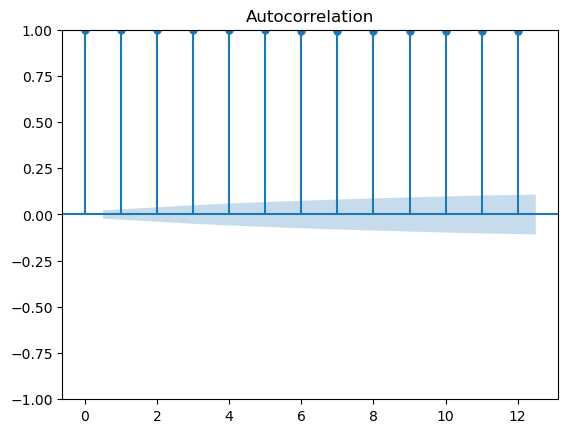

In [7]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data.Ex_rate,lags=12)
#tsa_plots.plot_pacf(Walmart.Footfalls,lags=12)
plt.show()

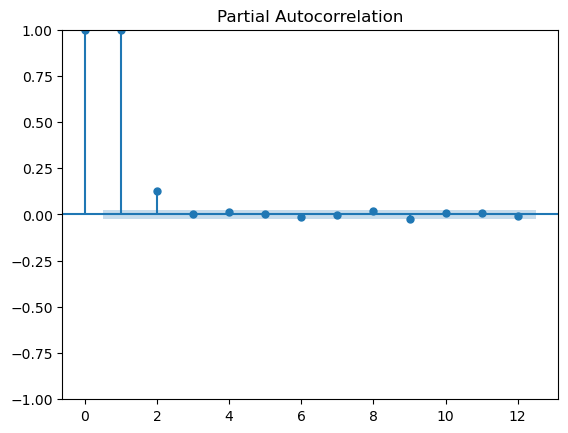

In [8]:
tsa_plots.plot_pacf(data.Ex_rate,lags=12)
plt.show()

In [9]:
# Step 2: Model Fitting
from statsmodels.tsa.arima.model import ARIMA

# Define the model
p, d, q = 1, 1, 1  # These values should be chosen based on ACF and PACF plots
arima_model = ARIMA(data['Ex_rate'], order=(p, d, q))

# Fit the model
arima_result = arima_model.fit()

# Summary of the model
print(arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Sat, 17 Aug 2024   AIC                         -56102.322
Time:                        13:56:40   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

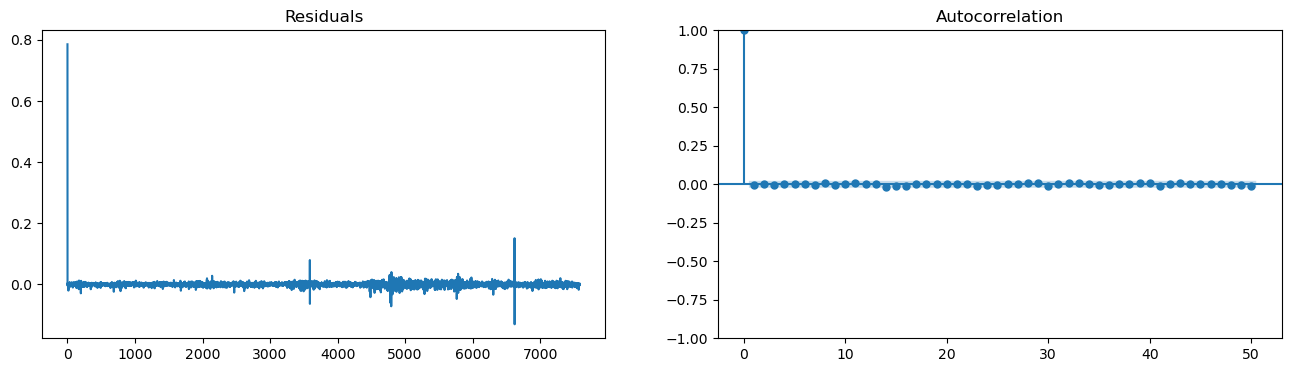

In [11]:
# Step 3: Diagnostics
# Residual diagnostics
residuals = arima_result.resid
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
axes[0].plot(residuals)
axes[0].set_title('Residuals')
plot_acf(residuals, lags=50, ax=axes[1])
plt.show()

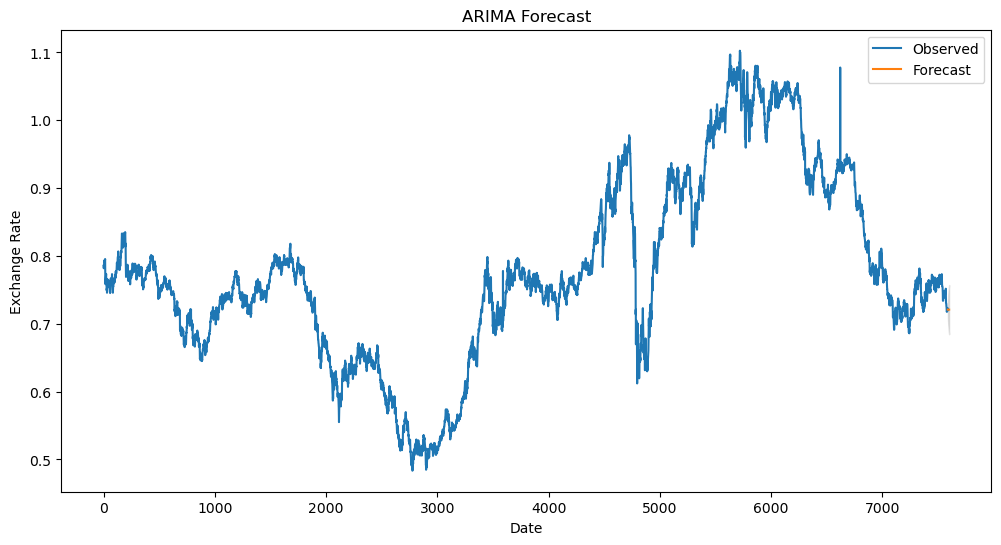

In [12]:
# Step 4: Forecasting
# Forecasting
forecast_steps = 12  # Number of steps to forecast
forecast = arima_result.get_forecast(steps=forecast_steps)
forecast_ci = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(data['Ex_rate'], label='Observed')
plt.plot(forecast.predicted_mean, label='Forecast')
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1], color='k', alpha=0.1)
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

## Part 3: Model Building - Exponential Smoothing

1.Model Selection: Depending on the time series characteristics, choose an appropriate Exponential Smoothing model (Simple, Holt’s Linear, or Holt-Winters).

2.Parameter Optimization: Use techniques such as grid search or AIC to find the optimal parameters for the smoothing levels and components.

3.Model Fitting and Forecasting: Fit the chosen Exponential Smoothing model and forecast future values. Compare these forecasts visually with the actual data.

In [13]:
# Step 1: Model Selection
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Define the model (Holt-Winters Exponential Smoothing)
exp_model = ExponentialSmoothing(data['Ex_rate'], seasonal='add', seasonal_periods=12)

# Fit the model
exp_result = exp_model.fit()

# Summary of the model
print(exp_result.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ex_rate   No. Observations:                 7588
Model:             ExponentialSmoothing   SSE                              0.273
Optimized:                         True   AIC                         -77628.560
Trend:                             None   BIC                         -77531.479
Seasonal:                      Additive   AICC                        -77628.488
Seasonal Periods:                    12   Date:                 Sat, 17 Aug 2024
Box-Cox:                          False   Time:                         13:58:27
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.8698373                alpha                 True
smoothing_seasonal       

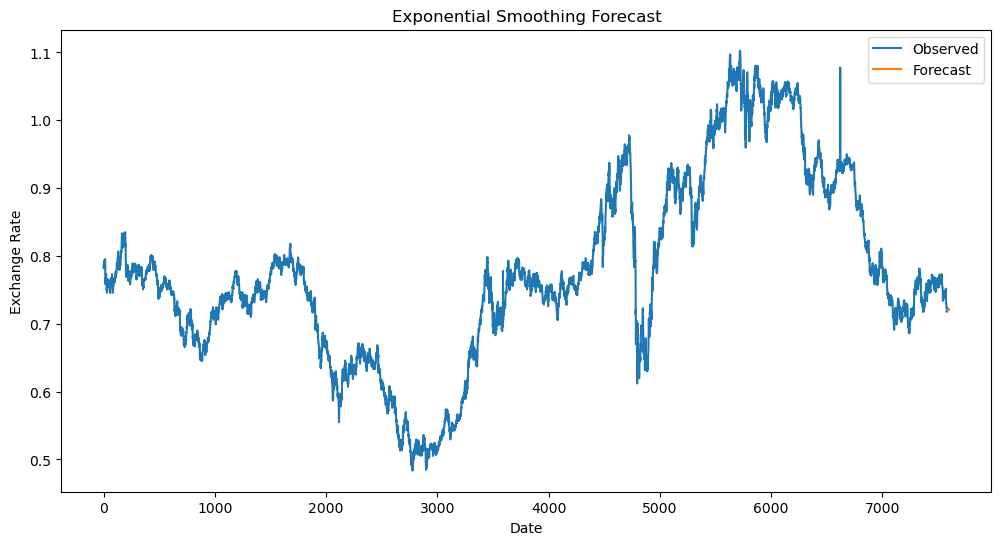

In [14]:
# Forecasting
exp_forecast = exp_result.forecast(steps=forecast_steps)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(data['Ex_rate'], label='Observed')
plt.plot(exp_forecast, label='Forecast')
plt.title('Exponential Smoothing Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


## Part 4: Evaluation and Comparison

1.Compute Error Metrics: Use metrics such as MAE, RMSE, and MAPE to evaluate the forecasts from both models.

2.Model Comparison: Discuss the performance, advantages, and limitations of each model based on the observed results and error metrics.

3.Conclusion: Summarize the findings and provide insights on which model(s) yielded the best performance for forecasting exchange rates in this dataset.

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Compute error metrics for ARIMA
arima_forecast_values = forecast.predicted_mean
arima_mae = mean_absolute_error(data['Ex_rate'][-forecast_steps:], arima_forecast_values)
arima_rmse = np.sqrt(mean_squared_error(data['Ex_rate'][-forecast_steps:], arima_forecast_values))
arima_mape = np.mean(np.abs((data['Ex_rate'][-forecast_steps:] - arima_forecast_values) / data['Ex_rate'][-forecast_steps:])) * 100

# Compute error metrics for Exponential Smoothing
exp_forecast_values = exp_forecast
exp_mae = mean_absolute_error(data['Ex_rate'][-forecast_steps:], exp_forecast_values)
exp_rmse = np.sqrt(mean_squared_error(data['Ex_rate'][-forecast_steps:], exp_forecast_values))
exp_mape = np.mean(np.abs((data['Ex_rate'][-forecast_steps:] - exp_forecast_values) / data['Ex_rate'][-forecast_steps:])) * 100

print(f"ARIMA MAE: {arima_mae}, RMSE: {arima_rmse}, MAPE: {arima_mape}%")
print(f"Exponential Smoothing MAE: {exp_mae}, RMSE: {exp_rmse}, MAPE: {exp_mape}%")


ARIMA MAE: 0.0016644924340379526, RMSE: 0.002000358073451703, MAPE: nan%
Exponential Smoothing MAE: 0.0015781974314659404, RMSE: 0.001871752270401754, MAPE: nan%


In [16]:
# Based on error metrics, we can see which model performs better

if arima_mae < exp_mae:
    print("ARIMA model performs better in terms of MAE.")
else:
    print("Exponential Smoothing model performs better in terms of MAE.")

if arima_rmse < exp_rmse:
    print("ARIMA model performs better in terms of RMSE.")
else:
    print("Exponential Smoothing model performs better in terms of RMSE.")

if arima_mape < exp_mape:
    print("ARIMA model performs better in terms of MAPE.")
else:
    print("Exponential Smoothing model performs better in terms of MAPE.")


Exponential Smoothing model performs better in terms of MAE.
Exponential Smoothing model performs better in terms of RMSE.
Exponential Smoothing model performs better in terms of MAPE.
